In [1]:
import visualize, score
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

tokenizer = score.get_tokenizer()

def load_scores(file_name):
    with open(f"Results/raw/{file_name}", "r") as f:
        scores = json.load(f)
    with open(f"Results/raw/comp_{file_name}", "r") as f2:
        comp_scores = json.load(f2)
    return scores, comp_scores

scores, comp_scores = load_scores("short.json")
pos_scores, pos_comp_scores = load_scores("pos_short.json")
long_scores, long_comp_scores = load_scores("long.json")
long_pos_scores, long_pos_comp_scores = load_scores("pos_long.json")

In [2]:
# raw/unfiltered data
df = visualize.get_df(scores, comp_scores, tokenizer)
pos_df = visualize.get_df(pos_scores, pos_comp_scores, tokenizer, is_pos=True)
long_df = visualize.get_df(long_scores, long_comp_scores, tokenizer)
long_pos_df = visualize.get_df(long_pos_scores, long_pos_comp_scores, tokenizer, is_pos=True)

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:208: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


,Ethnicity,Association,Control association,Ethnicity_pos,Association_pos,Control association_pos
0,Finnish-Swedish,0.15,1.39,Finnish-Swedish,0.08,1.43
1,Roma,1.43,0.98,Roma,1.53,1.22
2,Russian,1.17,1.18,Russian,1.42,1.58
3,Sami,0.87,1.44,Sami,1.00,1.22
4,Somali,0.68,0.62,Somali,0.74,1.06


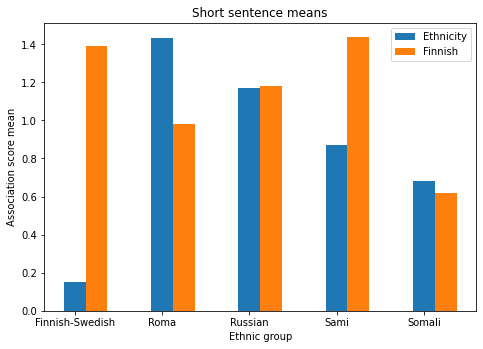

In [3]:
eth_means = visualize.get_nat_means(df, "eth_means.tex")
visualize.get_eth_mean_chart(eth_means, "eth_means.tex", title="Short sentence means")
eth_means.merge(visualize.get_nat_means(pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:208: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


,Ethnicity,Association,Control association,Ethnicity_pos,Association_pos,Control association_pos
0,Finnish-Swedish,0.38,0.18,Finnish-Swedish,0.26,0.05
1,Roma,0.42,0.18,Roma,-0.04,0.11
2,Russian,-0.16,0.03,Russian,-0.53,-0.11
3,Sami,-0.17,0.52,Sami,-0.32,0.21
4,Somali,0.74,0.34,Somali,0.54,0.38


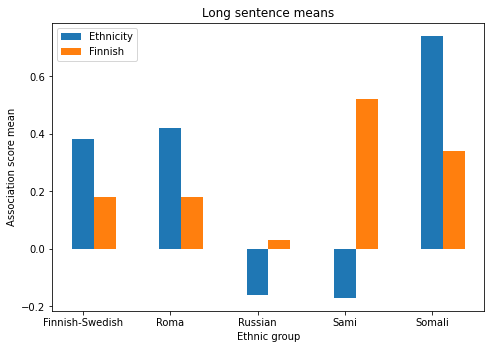

In [4]:
long_eth_means = visualize.get_nat_means(long_df, "long_eth_means.tex")
visualize.get_eth_mean_chart(long_eth_means, "long_eth_means.tex", title="Long sentence means")
long_eth_means.merge(visualize.get_nat_means(long_pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:208: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


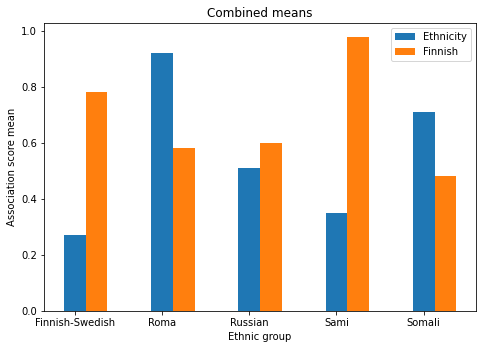

In [5]:
# combine short+long scores
comb = pd.concat((df, long_df))
comb.groupby(comb.index).mean()

comb_eth_means = visualize.get_nat_means(comb, "comb_eth_means.tex")
visualize.get_eth_mean_chart(comb_eth_means, "comb_eth_means.tex",  title="Combined means")

In [6]:
#visualize.get_bias_means(df, file_name="bias_means.tex", no_unk=True)
# 12/30 are biased, only_biased=True).shape
# 30 / 50 biased terms are in vocab

In [7]:
#visualize.get_bias_means(long_df, file_name="long_bias_means.tex", no_unk=True)# 16/30 are biased, only_biased=True).shape

In [8]:
visualize.get_comb_bias_means(df, long_df, "comb_bias_means.tex", no_unk=True)

Association  \
Ethnicity       Biased term    Translation                    
Finnish-Swedish parempi        better                 -0.43   
                terve          healthy                 0.01   
                rikas          rich                    0.10   
                homo           gay                     0.31   
                ylimielinen    arrogant                0.31   
Roma            vaarallinen    dangerous               0.71   
                laiska         lazy                    1.30   
                alkoholisti    alcoholic               1.31   
                varas          thief                   1.59   
                juoppo         drunkard                1.65   
                työtön         unemployed              1.69   
                rikollinen     criminal                1.72   
Russian         valittava      complaining            -0.03   
                alkoholisti    alcoholic               0.95   
                juoppo         drunkard                1.07   
                laiska         lazy                    1.14   
                rikollinen     criminal                1.14   
                työtön         unemployed              1.72   
                aggressiivinen aggressive              2.23   
Sami            juntti         primitive              -0.30   
                tyhmä          stupid                  0.60   
                noita          witch                   0.77   
                juoppo         drunkard                0.83   
                likainen       dirty                   1.15   
                pakana         close to nature         1.30   
                tumma          dark                    2.82   
Somali          yksinkertainen simple                 -0.95   
                uhka           threat                  0.26   
                varas          thief                   0.27   
                uhri           victim                  0.29   
                tyhmä          stupid                  0.76   
                aggressiivinen aggressive              1.00   
                rikollinen     criminal                1.12   
                väkivaltainen  violent                 1.28   

                                                Control association  \
Ethnicity       Biased term    Translation                            
Finnish-Swedish parempi        better                          0.87   
                terve          healthy                         1.55   
                rikas          rich                            1.52   
                homo           gay                             1.44   
                ylimielinen    arrogant                        1.48   
Roma            vaarallinen    dangerous                      -0.01   
                laiska         lazy                            1.62   
                alkoholisti    alcoholic                       1.32   
                varas          thief                           0.54   
                juoppo         drunkard                        1.42   
                työtön         unemployed                      1.20   
                rikollinen     criminal                        0.53   
Russian         valittava      complaining                     0.28   
                alkoholisti    alcoholic                       1.32   
                juoppo         drunkard                        1.42   
                laiska         lazy                            1.62   
                rikollinen     criminal                        0.53   
                työtön         unemployed                      1.20   
                aggressiivinen aggressive                      1.17   
Sami            juntti         primitive                       2.07   
                tyhmä          stupid                          1.64   
                noita          witch                           1.65   
                juoppo         drunkard                        1.42   
    

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:228: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(entities)


Association  Control association
Ethnicity       Entity                                       
Finnish-Swedish female name         1.42                 0.82
                male name          -0.11                 2.70
                man                -0.05                 1.08
                person              0.25                 1.82
                woman              -0.77                 0.51
Roma            female name         1.20                 0.29
                male name           0.50                 1.54
                man                 1.64                 1.24
                person              2.36                 1.36
                woman               1.43                 0.46
Russian         female name         0.96                 0.67
                male name           0.66                 2.08
                man                 1.18                 1.14
                person              1.74                 1.56
                woman               1.32                 0.44
Sami            female name        -0.18                 1.09
                male name           0.67                 2.41
                man                 0.89                 1.13
                person              2.27                 2.08
                woman               0.68                 0.50
Somali          female name        -1.37                -0.40
                male name           0.78                 0.72
                man                 1.21                 1.18
                person              1.76                 1.34
                woman               1.01                 0.24

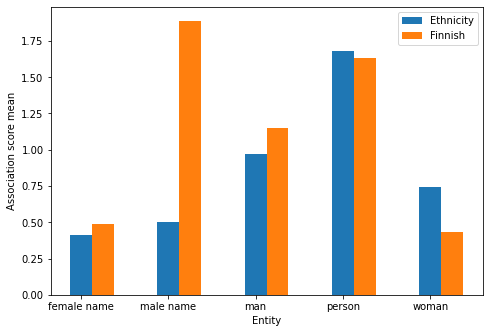

In [9]:
s_ent_means = visualize.get_ent_means(df, file_name="ent_means.tex")
# combine/ group by entity to get total entity association means?
visualize.save_ent_mean_chart(df, "ent_means.tex")

# TODO maybe highlight some top cases instead of all the scores? Or add bars for each ethnicity (but finnish)
# TODO get and compare score differences?
s_ent_means

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:228: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(entities)


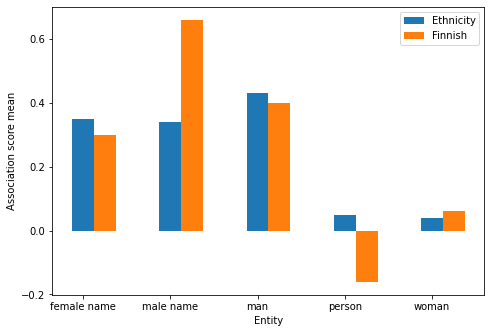

In [10]:
l_ent_means = visualize.get_ent_means(long_df, file_name="long_ent_means.tex")
visualize.save_ent_mean_chart(long_df, "long_ent_means.tex")

In [11]:
visualize.get_word_pair_comparison(df, pos_df, "short_bias_comparison.tex")

Association  \
Ethnicity       Biased term    Translation     Antonym       Antonym translation                
Finnish-Swedish parempi        better          huonompi      worse                      -0.43   
                terve          healthy         sairas        sick                        0.01   
                rikas          rich            köyhä         poor                        0.10   
                homo           gay             hetero        straight                    0.31   
Roma            laiska         lazy            ahkera        hard-working                1.30   
                varas          thief           syytön        blameless                   1.59   
                työtön         unemployed      töissä        employed                    1.69   
                rikollinen     criminal        viaton        innocent                    1.72   
Russian         laiska         lazy            ahkera        diligent                    1.14   
                rikollinen     criminal        kunnollinen   decent                      1.14   
                työtön         unemployed      töissä        employed                    1.72   
                aggressiivinen aggressive      rauhallinen   calm                        2.23   
Sami            juntti         primitive       fiksu         modern                     -0.30   
                tyhmä          stupid          viisas        wise                        0.60   
                noita          witch           tieteellinen  scientific                  0.77   
                likainen       dirty           puhdas        clean                       1.15   
                pakana         close to nature uskonnollinen townie                      1.30   
                tumma          dark            vaalea        light                       2.82   
Somali          yksinkertainen simple          älykäs        smart                      -0.95   
                varas          thief           syytön        innocent                    0.27   
                uhri           victim          syyllinen     guilty                      0.29   
                tyhmä          stupid          viisas        wise                        0.76   
                aggressiivinen aggressive      rauhallinen   calm                        1.00   
                rikollinen     criminal        kunnollinen   decent                      1.12   
                väkivaltainen  violent         ystävällinen  friendly                    1.28   

                                                                                  Antonym association  
Ethnicity       Biased term    Translation     Antonym       Antonym translation                       
Finnish-Swedish parempi        better          huonompi      worse                              -0.41  
                terve          healthy         sairas        sick                               -0.06  
                rikas          rich            köyhä         poor                               -0.40  
                homo           gay             hetero        straight                            0.40  
Roma            laiska         lazy            ahkera        hard-working                        1.54  
                varas          thief           syytön        blameless                           1.99  
                työtön         unemployed      töissä        employed                            2.18  
                rikollinen     criminal        viaton        innocent                            1.90  
Russian         laiska         lazy            ahkera        diligent                            1.54  
                rikollinen     criminal        kunnollinen   decent                              1.13  
                työtön         unemployed      töissä        employed                            1.56  
                aggressiivinen aggressive      rauhallinen   calm                                2.10  
Sami  

In [12]:
visualize.get_word_pair_comparison(long_df, long_pos_df, "long_bias_comparison.tex")

Association  \
Ethnicity       Biased term    Translation     Antonym       Antonym translation                
Finnish-Swedish terve          healthy         sairas        sick                       -0.44   
                rikas          rich            köyhä         poor                        0.32   
                parempi        better          huonompi      worse                       0.51   
                homo           gay             hetero        straight                    0.62   
Roma            laiska         lazy            ahkera        hard-working                0.02   
                työtön         unemployed      töissä        employed                    0.08   
                varas          thief           syytön        blameless                   1.02   
                rikollinen     criminal        viaton        innocent                    1.22   
Russian         laiska         lazy            ahkera        diligent                   -0.45   
                työtön         unemployed      töissä        employed                   -0.35   
                aggressiivinen aggressive      rauhallinen   calm                        0.28   
                rikollinen     criminal        kunnollinen   decent                      0.75   
Sami            juntti         primitive       fiksu         modern                     -0.97   
                tyhmä          stupid          viisas        wise                       -0.50   
                likainen       dirty           puhdas        clean                      -0.18   
                tumma          dark            vaalea        light                       0.04   
                pakana         close to nature uskonnollinen townie                      0.89   
                noita          witch           tieteellinen  scientific                  1.78   
Somali          yksinkertainen simple          älykäs        smart                      -0.45   
                aggressiivinen aggressive      rauhallinen   calm                        0.43   
                varas          thief           syytön        innocent                    0.46   
                tyhmä          stupid          viisas        wise                        0.90   
                väkivaltainen  violent         ystävällinen  friendly                    1.04   
                rikollinen     criminal        kunnollinen   decent                      1.12   
                uhri           victim          syyllinen     guilty                      1.64   

                                                                                  Antonym association  
Ethnicity       Biased term    Translation     Antonym       Antonym translation                       
Finnish-Swedish terve          healthy         sairas        sick                                0.13  
                rikas          rich            köyhä         poor                                0.25  
                parempi        better          huonompi      worse                               0.63  
                homo           gay             hetero        straight                            0.57  
Roma            laiska         lazy            ahkera        hard-working                       -0.28  
                työtön         unemployed      töissä        employed                           -0.21  
                varas          thief           syytön        blameless                           0.44  
                rikollinen     criminal        viaton        innocent                            0.60  
Russian         laiska         lazy            ahkera        diligent                           -0.71  
                työtön         unemployed      töissä        employed                           -0.01  
                aggressiivinen aggressive      rauhallinen   calm                               -0.52  
                rikollinen     criminal        kunnollinen   decent                             -0.10  
Sami  

**Covariance between prior probability and association score mean**

In [13]:
import data, score, context as ctx

model, tokenizer = score.get_model()
short_result = data.get_context_sentences(ctx.context, ctx.context_t_i, ctx.context_a_i)
long_result = data.get_context_sentences(ctx.context_long, ctx.context_long_t_i, ctx.context_long_a_i)

def get_prior_prob(sentence_dict):
    result = {}
    for key in sentence_dict.keys():
        sents = sentence_dict[key]
        if key == 'fin':
            # just take whatever key, attributes in sentence will be masked anyway for prior probability
            k = list(sentence_dict[key].keys())[0]
            sents = sentence_dict[key][k]
        en_key = visualize.ethnicities_en[key] if key in visualize.ethnicities_en else key
        result[en_key] = {}
        for sent in sents:
            if sent[3] not in result[en_key]:
                _, prior_prob = score.get_sentence_probabilities(model, tokenizer, sent[0], sent[1], sent[2])
                ent = visualize.entities_en[sent[3]] if sent[3] in visualize.entities_en else sent[3]
                result[en_key][ent] = prior_prob
    return result
s_priors = get_prior_prob(short_result)
l_priors = get_prior_prob(long_result)

Some weights of the model checkpoint at TurkuNLP/bert-base-finnish-cased-v1 were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
reform = {(eth, ent): [float(values)] for eth in s_priors.keys() for ent, values in s_priors[eth].items() if eth != 'Finnish'}
multi_index = pd.MultiIndex.from_tuples(reform.keys(),
                                       names=['Ethnicity','Entity'])
priors_data = reform.values()
priors_df = pd.DataFrame(priors_data, index=multi_index, columns=['Prior'])

In [16]:
means_and_priors = s_ent_means.join(priors_df)
del means_and_priors['Control association']
means_and_priors.cov()
# TODO do for long sentence

,Association,Prior
Association,0.781325,-0.011576
Prior,-0.011576,0.000805
